# RUN SVM model with the selected index

### 1. Call the data and split it for model process
### 2. Prepare the model, run and evaluate the model


-----------------------------------------------------------------

### 1. Call the data and split it for model process

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
my_root_dir = "/content/drive/MyDrive/Datos/GEE"
dataframe = pd.read_excel('../DataIntermediate/All_data.xlsx')
dataframe.head(382)

,b1,b2,b3,b4,b5,b6,b7,b8,NDVI,SR,...,b1_1 (Clay+Silt),b2_1(Sand_Raster),b3_1 (Silt Raster),b4_1 (Clay Raster,b8_asm,Id,SAR,CE,Tanbanca,Tabanca_Id
0,548.50,707.00,850.00,926.50,1254.0,1325.00,1664.50,2842.00,0.364127,2.145283,...,0.850000,0.150000,0.460000,0.390000,0.104167,1,26.926614,7.089333,Cafine,1
1,541.00,662.00,784.50,844.50,1083.0,967.00,1356.50,2455.50,0.439585,2.568796,...,0.519413,0.473399,0.337389,0.181547,0.104167,2,86.327645,30.558000,Cafine,1
2,491.00,623.50,765.50,818.00,1034.5,903.50,1446.50,2762.50,0.508677,3.070660,...,0.654887,0.343329,0.461192,0.192468,0.104167,3,112.754286,44.382000,Cafine,1
3,607.00,689.00,840.50,885.00,1112.5,983.00,1362.50,2370.00,0.416839,2.429589,...,0.524789,0.470715,0.431571,0.093336,0.104167,4,193.130080,93.534000,Cafine,1
4,585.50,657.00,762.00,800.50,951.5,861.00,1086.50,1832.00,0.354755,2.100475,...,0.517816,0.474641,0.407218,0.110598,0.104167,5,126.060248,60.254000,Cafine,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,974.50,703.75,1257.25,930.25,1528.5,1228.00,1406.75,2492.50,0.344621,2.075156,...,0.692295,0.310875,0.336182,0.356843,0.104167,96,23.296082,7.089333,Enchugal,3
378,794.75,445.00,946.75,534.00,1075.0,698.25,819.50,1532.00,0.360797,2.177036,...,0.508479,0.489504,0.404964,0.103152,0.105903,97,63.716873,13.406000,Enchugal,3
379,931.25,664.50,1210.50,884.75,1473.0,1163.50,1338.00,2224.75,0.313487,1.940419,...,0.605472,0.394263,0.350643,0.254651,0.104167,98,135.108655,72.286000,Enchugal,3
380,882.50,599.50,1174.50,843.50,1389.5,1079.00,1335.00,2600.00,0.413462,2.424643,...,0.508871,0.488434,0.413577,0.095293,0.104167,99,122.818091,62.814000,Enchugal,3


In [8]:
# Crear DataFrames X1 y y1
X1 = pd.DataFrame(dataframe, columns=['RNDSI','YRNDSI','NDSI','NDWI','GNDVI', 'GCVI', 'GRVI' ,'YRNDVI' ,'NDVI', 'SAVI' ,'RNDVI', 'b1_1 (Clay+Silt)',	'b2_1(Sand_Raster)',	'b3_1 (Silt Raster)',	'b4_1 (Clay Raster']).dropna() # 'b1_1','b2_1','b3_1', 'b4_1'
y1 = pd.DataFrame(dataframe[["CE"]]).dropna()


X1.head()

,RNDSI,YRNDSI,NDSI,NDWI,GNDVI,GCVI,GRVI,YRNDVI,NDVI,SAVI,RNDVI,b1_1 (Clay+Silt),b2_1(Sand_Raster),b3_1 (Silt Raster),b4_1 (Clay Raster
0,-0.257474,-0.386275,-0.364127,-0.538803,0.538803,2.336546,3.336546,0.386275,0.364127,0.242722,0.257474,0.850000,0.150000,0.460000,0.390000
1,-0.288211,-0.391789,-0.439585,-0.513050,0.513050,2.107235,3.107235,0.391789,0.439585,0.293014,0.288211,0.519413,0.473399,0.337389,0.181547
2,-0.314288,-0.453342,-0.508677,-0.562505,0.562505,2.571547,3.571547,0.453342,0.508677,0.339072,0.314288,0.654887,0.343329,0.461192,0.192468
3,-0.265498,-0.365170,-0.416839,-0.473273,0.473273,1.797036,2.797036,0.365170,0.416839,0.277851,0.265498,0.524789,0.470715,0.431571,0.093336
4,-0.261639,-0.318139,-0.354755,-0.402379,0.402379,1.346602,2.346602,0.318139,0.354755,0.236459,0.261639,0.517816,0.474641,0.407218,0.110598


In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state= 71) 

pd.DataFrame(y_train).head(200)
# print(y_train)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (305, 15)
X_test: (77, 15)
y_train: (305, 1)
y_test: (77, 1)


### 2. Prepare the model, run and evaluate the model

C:\Users\cespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test set Pearson correlation: 0.6688428475189331


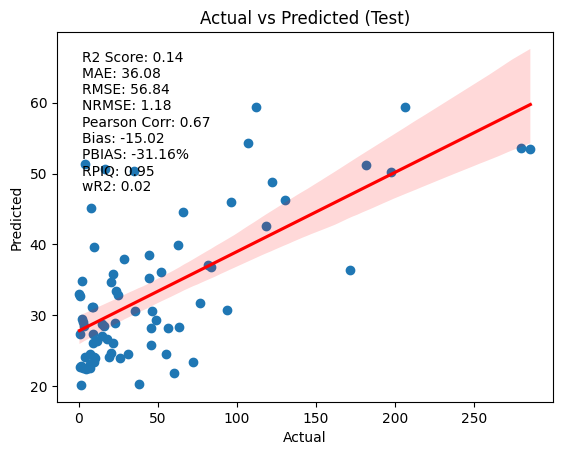

C:\Users\cespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train set Pearson correlation: 0.583447384688532


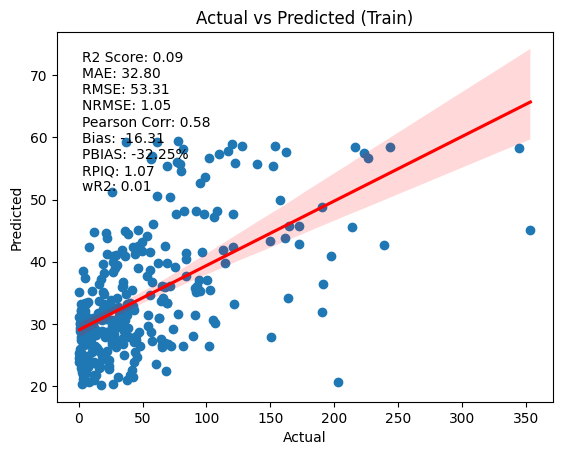

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Función para calcular RPIQ
def calculate_rpiq(y_true, y_pred):
    Q1 = np.percentile(y_true, 25)
    Q3 = np.percentile(y_true, 75)
    IQR = Q3 - Q1
    SEP = np.sqrt(np.mean((y_true - y_pred) ** 2))  # Equivalent to RMSE
    return IQR / SEP

# Función para calcular weighted R2 (wR2)
def calculate_wr2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    b, _ = np.polyfit(y_true, y_pred, 1)  # Slope of the regression line
    if b <= 1:
        return abs(b) * r2
    else:
        return (1 / abs(b)) * r2

# Define your SVR fitting function
def fit_svr(X_train, y_train):
    model = SVR(kernel='rbf', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False)
    model.fit(X_train, y_train.ravel())
    return model

# Function to predict and evaluate the model
def predict_and_evaluate(model, X, y_true):
    # Predict on the data
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    pearson_corr, _ = pearsonr(y_true, y_pred)

    # Calculate bias
    bias = np.mean(y_pred - y_true)

    # Calculate PBIAS (Percentage Bias)
    pbias = 100 * np.sum(y_pred - y_true) / np.sum(y_true)

    # Calculate NRMSE (Normalized RMSE)
    nrmse = rmse / np.mean(y_true)

    # Calculate RPIQ
    rpiq = calculate_rpiq(y_true, y_pred)

    # Calculate wR2
    wr2 = calculate_wr2(y_true, y_pred)

    return y_pred, r2, mae, rmse, pearson_corr, bias, pbias, nrmse, rpiq, wr2

# Function to visualize the results including bias and PBIAS
def plot_results_with_bias(y_true, y_pred, title, r2, mae, rmse, pearson_corr, bias, pbias, nrmse, rpiq, wr2):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(title)

    # Add the regression line
    sns.regplot(x=y_true, y=y_pred, scatter=False, ax=ax, color='red')

    # Add metrics as annotations
    ax.annotate(
        f'R2 Score: {r2:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nNRMSE: {nrmse:.2f}\nPearson Corr: {pearson_corr:.2f}\n'
        f'Bias: {bias:.2f}\nPBIAS: {pbias:.2f}%\nRPIQ: {rpiq:.2f}\nwR2: {wr2:.2f}',
        xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10
    )

    plt.show()

# DataFrames X1 and y1
# Assuming 'dataframe' is defined somewhere earlier
X1 = pd.DataFrame(dataframe, columns=['RNDSI', 'NDSI', 'NDWI', 'b3_1 (Silt Raster)']).dropna()
y1 = pd.DataFrame(dataframe[["CE"]]).dropna()

# Ensure X and y are aligned
X = X1.loc[y1.index]
y = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the SVR model
svr_model = fit_svr(X_train_scaled, y_train.to_numpy())

# Predict and evaluate on the test set
y_pred_test, r2_test, mae_test, rmse_test, pearson_corr_test, bias_test, pbias_test, nrmse_test, rpiq_test, wr2_test = predict_and_evaluate(
    svr_model, X_test_scaled, y_test.to_numpy().ravel()
)
print('Test set Pearson correlation:', pearson_corr_test)
plot_results_with_bias(y_test.to_numpy().ravel(), y_pred_test, "Actual vs Predicted (Test)", r2_test, mae_test, rmse_test,
                       pearson_corr_test, bias_test, pbias_test, nrmse_test, rpiq_test, wr2_test)

# Predict and evaluate on the training set
y_pred_train, r2_train, mae_train, rmse_train, pearson_corr_train, bias_train, pbias_train, nrmse_train, rpiq_train, wr2_train = predict_and_evaluate(
    svr_model, X_train_scaled, y_train.to_numpy().ravel()
)
print('Train set Pearson correlation:', pearson_corr_train)
plot_results_with_bias(y_train.to_numpy().ravel(), y_pred_train, "Actual vs Predicted (Train)", r2_train, mae_train, rmse_train,
                       pearson_corr_train, bias_train, pbias_train, nrmse_train, rpiq_train, wr2_train)

